In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the raw dataset
# Following your structure: data/raw/
raw_data_path = '../data/raw/Bank Customer Churn Prediction.csv'
df = pd.read_csv(raw_data_path)

print(f"Dataset Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset Loaded: 10000 rows, 12 columns


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
def professional_audit(df):
    audit_report = pd.DataFrame({
        'Dtype': df.dtypes,
        'Nulls': df.isnull().sum(),
        'Null %': (df.isnull().sum() / len(df)) * 100,
        'Uniques': df.nunique(),
        'Zero Values': (df == 0).sum(),
        'Negative Values': (df.select_dtypes(include=[np.number]) < 0).sum()
    })
    return audit_report

audit = professional_audit(df)
print("--- Data Quality Audit Report ---")
display(audit)

--- Data Quality Audit Report ---


,Dtype,Nulls,Null %,Uniques,Zero Values,Negative Values
active_member,int64,0,0.0,2,4849,0.0
age,int64,0,0.0,70,0,0.0
balance,float64,0,0.0,6382,3617,0.0
churn,int64,0,0.0,2,7963,0.0
country,object,0,0.0,3,0,NaN
credit_card,int64,0,0.0,2,2945,0.0
credit_score,int64,0,0.0,460,0,0.0
customer_id,int64,0,0.0,10000,0,0.0
estimated_salary,float64,0,0.0,9999,0,0.0
gender,object,0,0.0,2,0,NaN


In [21]:
cat_cols = ['country', 'gender', 'products_number', 'credit_card', 'active_member', 'churn']

for col in cat_cols:
    print(f"\nUnique values for {col}:")
    print(df[col].unique())

# Audit for hidden "Dirty" categories (Whitespace, Case Sensitivity)
df['country_audit'] = df['country'].str.strip().str.lower()
if df['country'].nunique() != df['country_audit'].nunique():
    print("\n[ALERT] Inconsistent casing or whitespace detected in 'country' column.")


Unique values for country:
['France' 'Spain' 'Germany']

Unique values for gender:
['Female' 'Male']

Unique values for products_number:
[1 3 2 4]

Unique values for credit_card:
[1 0]

Unique values for active_member:
[1 0]

Unique values for churn:
[1 0]


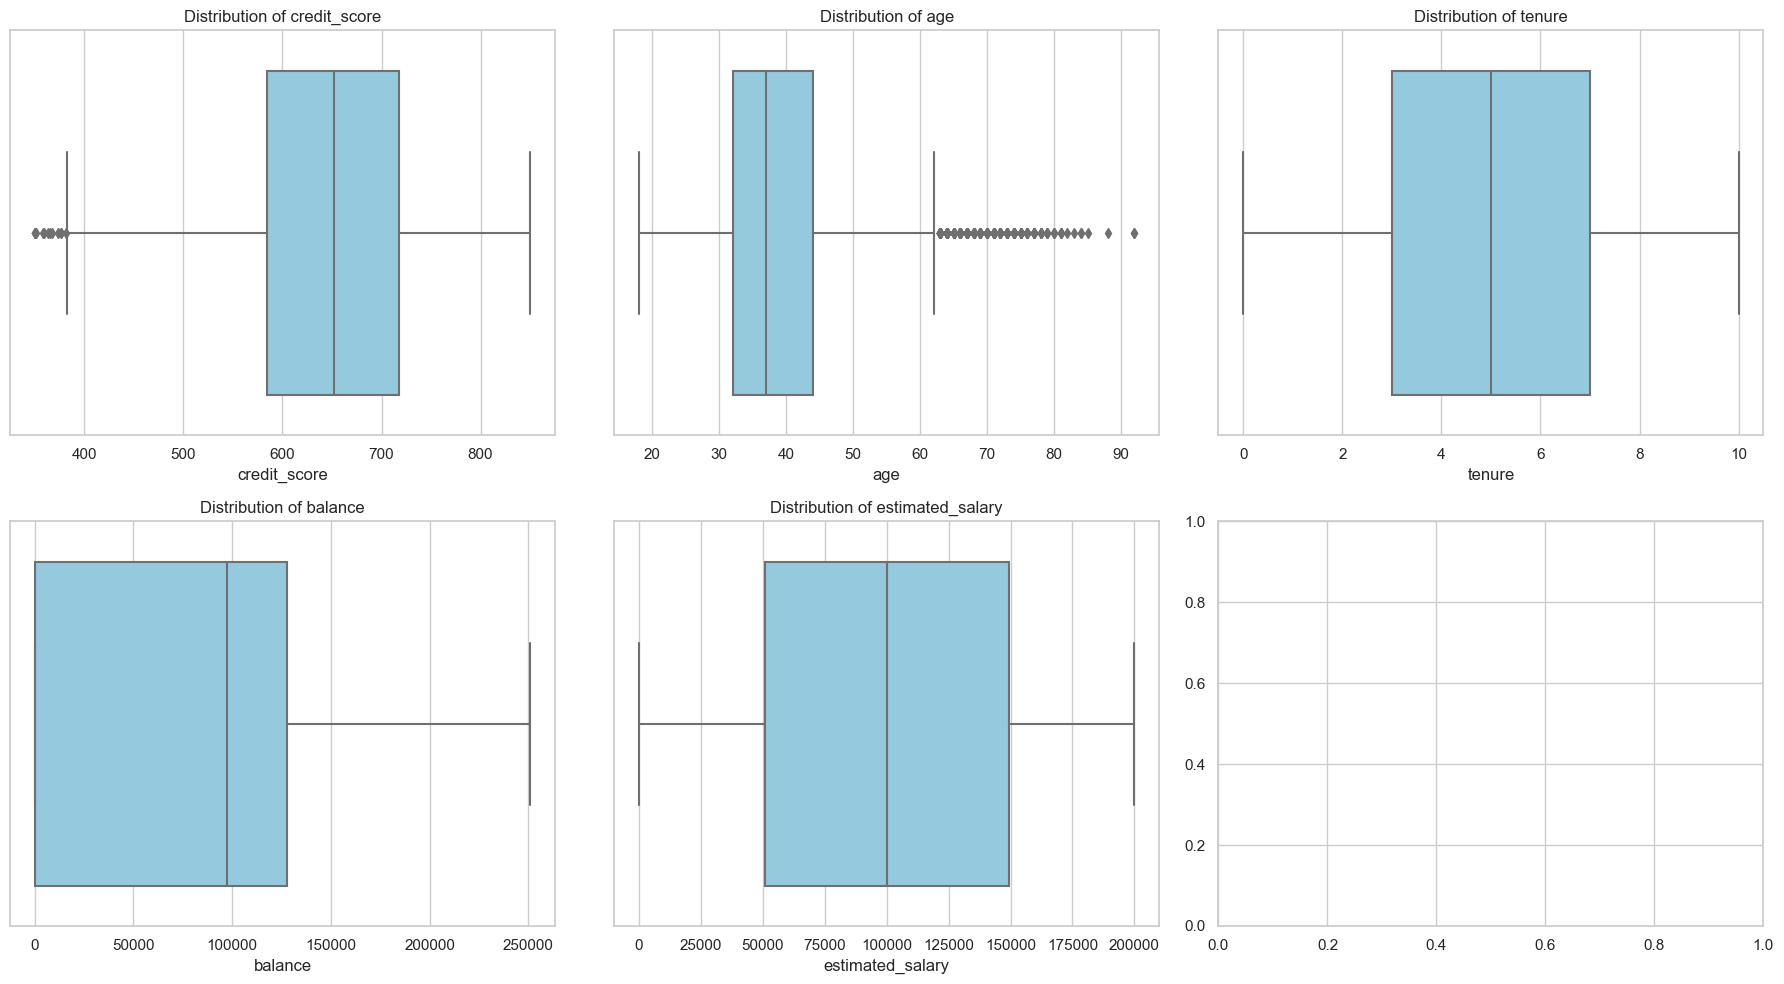

In [22]:
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Churn Distribution:
churn
0    79.63
1    20.37
Name: proportion, dtype: float64


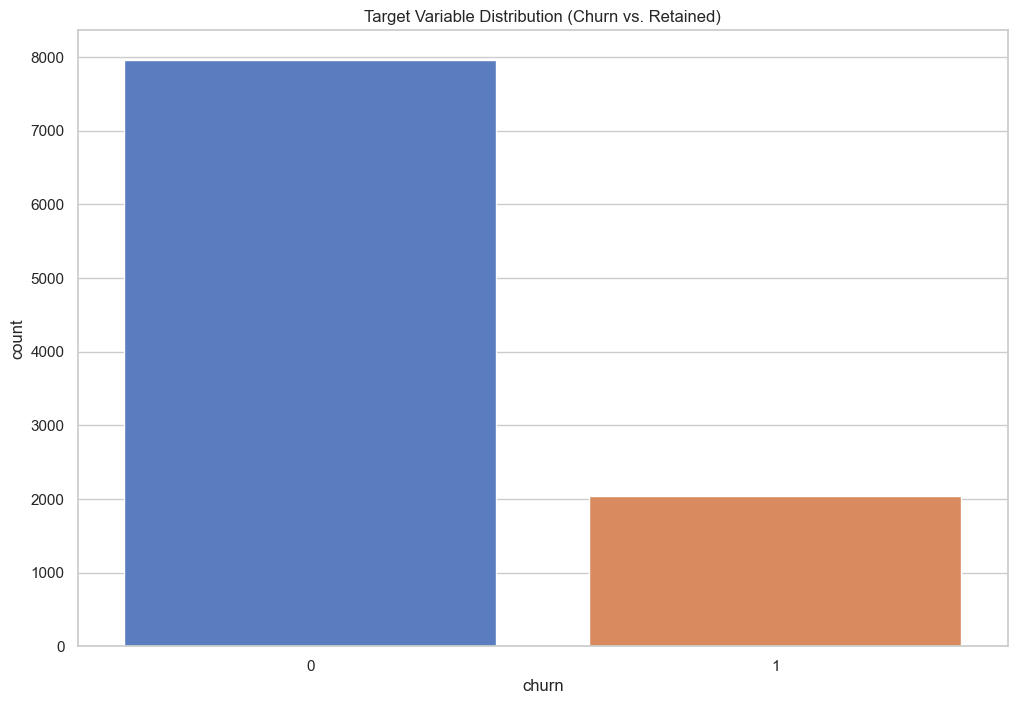

In [23]:
churn_counts = df['churn'].value_counts(normalize=True) * 100
print(f"Churn Distribution:\n{churn_counts}")

sns.countplot(data=df, x='churn')
plt.title('Target Variable Distribution (Churn vs. Retained)')
plt.show()

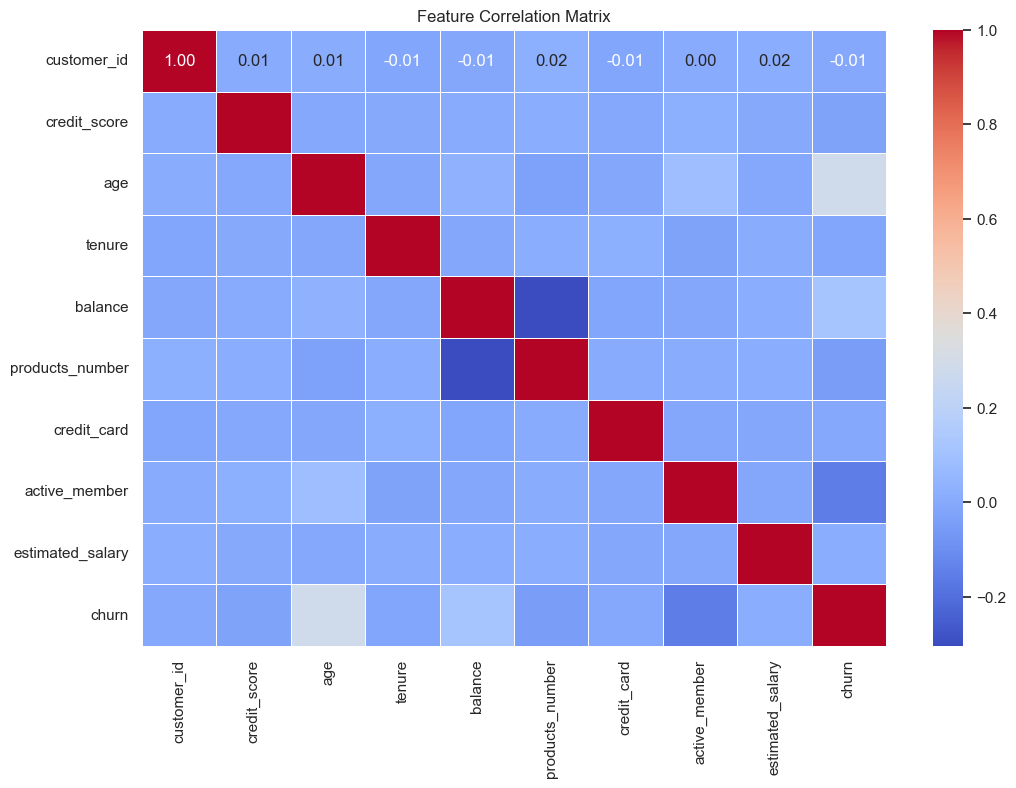

In [24]:
plt.figure(figsize=(12, 8))
# Drop non-numeric columns for correlation
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()